# Pandas vs Numpy

If we look back at our trajectory in Python, we should see that building from the lementary data structures we have progressed into m,ore complex data types exploited buy varous libraries.

In particular, we have seen how the efficient handling of numerical data types is perfomed in Python using the `numpy` numerical library and how this is further extended to handle tabular data using the `pandas` library.

`pandas` is built **on top** of `numpy` and provides high-level data structures and functions designed to make data analysis and manipulation easier and more intuitive.

Pandas chiefly operates with tabulated data stuctures called DataFrames, which are essentially 2-dimensional labeled data structures with columns of potentially different types. This makes `pandas` particularly well-suited for handling structured data, such as CSV files, SQL tables, and Excel spreadsheets.

On the other hand the building block of `numpy` is the `ndarray`, which is a powerful n-dimensional array, of which tables are just a particular instance (2-dimensional arrays). `numpy` is optimized for numerical computations and provides a wide range of mathematical functions to operate on these arrays efficiently.

In this lecture we will explore similarities and differences between `pandas` and `numpy`, and how to make them interoperate effectively.

## Reading data in 

We have seen that both `pandas` and `numpy` provide functions to read data from various file formats, but they do so in different ways.

In `numpy` we have functions like `numpy.loadtxt()` and `numpy.genfromtxt()` to read data from text files, while `pandas` offers more versatile functions like `pandas.read_csv()`, `pandas.read_excel()`, and `pandas.read_sql()` to read data from a variety of sources.


Consider a `CSV` file named `sample_data.csv` with the following content:

```csv
id,age,score,grade
1,20,85,4.0
2,21,,3.0
3,19,92,4.0
4,22,88,
5,20,76,3.0
6,,91,4.0
7,21,79,3.0
8,23,,2.0
9,20,95,4.0
10,22,82,
```

Notice that it contains some missing values.

In [7]:
# using a bash command to display the contents of a file
! cat sample_data.csv

id,age,score,grade
1,20,85,4.0
2,21,,3.0
3,19,92,4.0
4,22,88,
5,20,76,3.0
6,,91,4.0
7,21,79,3.0
8,23,,2.0
9,20,95,4.0
10,22,82,

We can read it in `numpy` simply with `genfromtxt`

In [16]:
import numpy as np

data = np.genfromtxt('sample_data.csv', delimiter=',', skip_header=1)
print(data)

[[ 1. 20. 85.  4.]
 [ 2. 21. nan  3.]
 [ 3. 19. 92.  4.]
 [ 4. 22. 88. nan]
 [ 5. 20. 76.  3.]
 [ 6. nan 91.  4.]
 [ 7. 21. 79.  3.]
 [ 8. 23. nan  2.]
 [ 9. 20. 95.  4.]
 [10. 22. 82. nan]]


`numpy` by default reads data directly into ndarrays, which contain homogeneous data types (the same `dtype`) 

In [17]:
data.dtype

dtype('float64')

Notice that the headers have been lost and the missing values interpreted as `nan` which is a value that exists in `numpy`

In [18]:
np.nan

nan

In `pandas`, we can read the same file using `read_csv()`

In [19]:
import pandas as pd

df = pd.read_csv('sample_data.csv')
df

,id,age,score,grade
0,1,20.0,85.0,4.0
1,2,21.0,NaN,3.0
2,3,19.0,92.0,4.0
3,4,22.0,88.0,NaN
4,5,20.0,76.0,3.0
5,6,NaN,91.0,4.0
6,7,21.0,79.0,3.0
7,8,23.0,NaN,2.0
8,9,20.0,95.0,4.0
9,10,22.0,82.0,NaN


This produces a `DataFrame` object, whidh is a bit richer: it contains the headers, the explicit indices and the data types of each column are inferred separately.

Cleaning the data from the missing values in `numpy` requires some ad hoc work: for example, we could decide to remove any row that contains a `nan` value using `numpy.isnan()` and boolean indexing:

In [20]:
# check that an entry is NaN
np.isnan(data)

array([[False, False, False, False],
       [False, False,  True, False],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False, False],
       [False,  True, False, False],
       [False, False, False, False],
       [False, False,  True, False],
       [False, False, False, False],
       [False, False, False,  True]])

In [21]:
# check that a row contains any NaN values
np.isnan(data).any(axis=1)

array([False,  True, False,  True, False,  True, False,  True, False,
        True])

In [26]:
# negate the above to get rows without NaN values
data_clean = data[~np.isnan(data).any(axis=1)]
# one can do the same with np.logical_not
# data_clean = data[np.logical_not(np.isnan(data).any(axis=1))]

data_clean

array([[ 1., 20., 85.,  4.],
       [ 3., 19., 92.,  4.],
       [ 5., 20., 76.,  3.],
       [ 7., 21., 79.,  3.],
       [ 9., 20., 95.,  4.]])

The same is a bit more immediate in `pandas`, where we can use the `dropna()` method to remove rows with any missing values:

In [28]:
df_clean = df.dropna()
df_clean

,id,age,score,grade
0,1,20.0,85.0,4.0
2,3,19.0,92.0,4.0
4,5,20.0,76.0,3.0
6,7,21.0,79.0,3.0
8,9,20.0,95.0,4.0


Notice that the resulting `DataFrame` still retains the column names and indices.

To completely forget the indices of the original data, we can reset them using the `reset_index()` method:

In [31]:
df_clean = df.dropna().reset_index(drop=True) # the drop=True avoids adding the old index as a new column
df_clean

,id,age,score,grade
0,1,20.0,85.0,4.0
1,3,19.0,92.0,4.0
2,5,20.0,76.0,3.0
3,7,21.0,79.0,3.0
4,9,20.0,95.0,4.0


From the pandas DataFrame, we can easily convert it back to a numpy ndarray using the `to_numpy()` method:

In [32]:
df_clean.to_numpy()

array([[ 1., 20., 85.,  4.],
       [ 3., 19., 92.,  4.],
       [ 5., 20., 76.,  3.],
       [ 7., 21., 79.,  3.],
       [ 9., 20., 95.,  4.]])

This is also equivalent to accessing the `values` attribute of the DataFrame:

In [33]:
df_clean.values

array([[ 1., 20., 85.,  4.],
       [ 3., 19., 92.,  4.],
       [ 5., 20., 76.,  3.],
       [ 7., 21., 79.,  3.],
       [ 9., 20., 95.,  4.]])

The `to_numpy()` method is preferred as it provides more options for controlling the conversion process. It is also a particular instance of the many `to_...()` methods that allow you to convert DataFrames in various formats:

In [35]:
# printing all methods that start with 'to_'
for method in dir(df_clean):
    if method.startswith('to_'):
        print(method)

to_clipboard
to_csv
to_dict
to_excel
to_feather
to_gbq
to_hdf
to_html
to_json
to_latex
to_markdown
to_numpy
to_orc
to_parquet
to_period
to_pickle
to_records
to_sql
to_stata
to_string
to_timestamp
to_xarray
to_xml


Useful methods that you may immediately recognise in their utility are:

- `DataFrame.to_dict()`: Converts the DataFrame to a dictionary.
- `DataFrame.to_json()`: Converts the DataFrame to a JSON string.
- `DataFrame.to_excel()`: Writes the DataFrame to an Excel file.    
- `DataFrame.to_csv()`: Writes the DataFrame to a CSV file.

We can also operate in the **opposite direction**, converting a `numpy` ndarray to a `pandas` DataFrame using the `pandas.DataFrame()` constructor: for this purpose, we may want to specify the column names explicitly using the `columns` parameter.


In [41]:
# using the numpy data_clean array to reconstruct a DataFrame
df_reconstructed = pd.DataFrame(data_clean, columns=['id', 'age', 'score', 'grade'])
df_reconstructed

,id,age,score,grade
0,1.0,20.0,85.0,4.0
1,3.0,19.0,92.0,4.0
2,5.0,20.0,76.0,3.0
3,7.0,21.0,79.0,3.0
4,9.0,20.0,95.0,4.0


## Indexing and Slicing

`numpy` uses the familiar zero-based integer indexing that we have seen in lists and arrays. We can access elements using integer indices, and we can slice arrays using the colon (`:`) operator.

For the given array

In [43]:
data_clean

array([[ 1., 20., 85.,  4.],
       [ 3., 19., 92.,  4.],
       [ 5., 20., 76.,  3.],
       [ 7., 21., 79.,  3.],
       [ 9., 20., 95.,  4.]])

We can pick various elements and slices:

In [62]:
print("First element of the first row:", data_clean[0,0]) 
print("Last element of the second row", data_clean[1,-1])
print("All data in the first column", data_clean[:,0] )
print("All data after the second column (included)\n", data_clean[: ,1:] )

First element of the first row: 1.0
Last element of the second row 4.0
All data in the first column [1. 3. 5. 7. 9.]
All data after the second column (included)
 [[20. 85.  4.]
 [19. 92.  4.]
 [20. 76.  3.]
 [21. 79.  3.]
 [20. 95.  4.]]


Pandas dataframes have (as we have seen it) a quite different syntax for indexing and slicing. 

The closest to `numpy`'s indexing is the `.iloc[]` method (*integer locator*), which allows integer-based indexing similar to `numpy` arrays.

In [63]:
print("First element of the first row:", df_clean.iloc[0,0]) 
print("Last element of the second row", df_clean.iloc[1,-1])
print("All data in the first column\n", df_clean.iloc[:,0])
print("All data after the second column (included)\n", df_clean.iloc[: ,1:] )

First element of the first row: 1
Last element of the second row 4.0
All data in the first column
 0    1
1    3
2    5
3    7
4    9
Name: id, dtype: int64
All data after the second column (included)
     age  score  grade
0  20.0   85.0    4.0
1  19.0   92.0    4.0
2  20.0   76.0    3.0
3  21.0   79.0    3.0
4  20.0   95.0    4.0


More in general, pandas provides label based indexing using the `.loc[]` method, which allows us to access data using row and column labels.

In this case the index is numerical:

In [50]:
df.index

RangeIndex(start=0, stop=10, step=1)

And the columns are labelled with strings:

In [49]:
df.columns

Index(['id', 'age', 'score', 'grade'], dtype='object')

So we we can do the following:

In [64]:
print("First element of the first row:", df_clean.loc[0,"id"]) 
print("Last element of the second row", df_clean.loc[1,'grade'])
print("All data in the first column\n", df_clean.loc[:,"id"])
print("All data after the second column (included)\n", df_clean.loc[: ,"age":] )

First element of the first row: 1
Last element of the second row 4.0
All data in the first column
 0    1
1    3
2    5
3    7
4    9
Name: id, dtype: int64
All data after the second column (included)
     age  score  grade
0  20.0   85.0    4.0
1  19.0   92.0    4.0
2  20.0   76.0    3.0
3  21.0   79.0    3.0
4  20.0   95.0    4.0


### Using  `[]` in pandas without `loc` or `iloc`

Some care needs to be taken when using the square brackets `[]` operator in `pandas`, as it can behave differently based on the context.

When we use `[]` direftly with a DataFrame, it primarily serves two purposes: selecting columns and filtering rows.



**Selecting columns**: When we pass a single string or a list of strings to `[]`, it selects the corresponding columns from the DataFrame.

In [65]:
df_clean["age"]

0    20.0
1    19.0
2    20.0
3    21.0
4    20.0
Name: age, dtype: float64

In [66]:
# passing a list of strings
df_clean[ ["id", "age"] ]

,id,age
0,1,20.0
1,3,19.0
2,5,20.0
3,7,21.0
4,9,20.0


**Filtering rows**: When we pass a boolean array or Series to `[]`, it filters the rows based on the boolean values.

In [68]:
df_clean[0:2]

,id,age,score,grade
0,1,20.0,85.0,4.0
1,3,19.0,92.0,4.0


Oddly enough, if we pass an single integer pandas will interpret it as a column selection, not as a row selection as one might expect, and this will raise an error if there is no column with that name.

In [69]:
df_clean[0]

KeyError: 0

**Important.** These inconsistencies should motivate you to prefer .loc and .iloc for DataFrame indexing.

## Mathematical operations on data tables

### Basic statistics

Numpy arrays readily have a few mathematicla methods that operate element-wise on the array data, such as `sum()`, `mean()`, `std()`, etc.

They operate on rows or columns depending on the `axis` parameter:

- axis=0 indicates that the operation is performed column-wise (i.e., along rows).
- axis=1 indicates that the operation is performed row-wise (i.e., along columns).

In [70]:
# column wise mean
data_clean.mean(axis=0)

array([ 5. , 20. , 85.4,  3.6])

Similar operations exist in pandas and work column-wise (default) or row-wise depending on the `axis` parameter as well.

In [71]:
df_clean.mean()

id        5.0
age      20.0
score    85.4
grade     3.6
dtype: float64

In [74]:
df_clean.mean(axis=1) #averaging across columns, which makes little sense fir this dataset

0    27.5
1    29.5
2    26.0
3    27.5
4    32.0
dtype: float64

We can also compute standard devations:

In [77]:
print("St deviation of each column according to numpy:\n", data_clean.std(axis=0))
print("St deviation of each column according to pandas:\n", df_clean.std())

St deviation of each column according to numpy:
 [2.82842712 0.63245553 7.28285658 0.48989795]
St deviation of each column according to pandas:
 id       3.162278
age      0.707107
score    8.142481
grade    0.547723
dtype: float64


Oh, the two appear to provide quantitatively different results! This may come to a surprise, but it is an example of how different libraries may implement similar functions with slightly different conventions, and how important it is to read the documentation carefully.


For numpy this is

In [79]:
help(np.std)

Help on _ArrayFunctionDispatcher in module numpy:

std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>)
    Compute the standard deviation along the specified axis.
    
    Returns the standard deviation, a measure of the spread of a distribution,
    of the array elements. The standard deviation is computed for the
    flattened array by default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Calculate the standard deviation of these values.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the standard deviation is computed. The
        default is to compute the standard deviation of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a standard deviation is performed over
        multiple axes, instead of a single axis or all the axes as before.
    dtype : dtype, optional
        Type to use in computing the standard

If you read the documentation correctl you will find that `numpy.std()` by default computes the standard deviation with with degree of freedom `ddof=0`, which is the *population standard deviation*

$$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}$$

This is different from the *sample standard deviation* formula, which uses `ddof=1`

$$s = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x})^2}$$

The two have different meanings: 

- the population standard deviation is used when you have data for the **entire population**
- the sample standard deviation is used when you have a **sample** from a larger population and want to estimate the **population standard deviation**.

`pandas` by default uses the sample standard deviation formula (`ddof=1`).

In order to match the two results, we can specify `ddof=0` in the function calls

In [84]:
# change this value to 1 to see the difference
selected_ddof = 0
print("St deviation of each column according to numpy:\n", data_clean.std(axis=0, ddof=selected_ddof))
print("St deviation of each column according to pandas:\n", df_clean.std(ddof=selected_ddof))

St deviation of each column according to numpy:
 [2.82842712 0.63245553 7.28285658 0.48989795]
St deviation of each column according to pandas:
 id       2.828427
age      0.632456
score    7.282857
grade    0.489898
dtype: float64


### More general mathematical operations

Numpy has a large set of mathematical functions that can be applied element-wise to arrays, such as `np.sin()`, `np.exp()`, `np.log()`, etc.

What if we want to apply these functions to pandas DataFrames?

We can surely create new columns by applying numpy functions to existing columns:

In [86]:
df_clean["log grade"] = np.log(df_clean["grade"])

df_clean

,id,age,score,grade,log grade
0,1,20.0,85.0,4.0,1.386294
1,3,19.0,92.0,4.0,1.386294
2,5,20.0,76.0,3.0,1.098612
3,7,21.0,79.0,3.0,1.098612
4,9,20.0,95.0,4.0,1.386294


We can even apply the functions to the entire DataFrame, and `numpy` will apply them element-wise:

In [88]:
np.log(df_clean) # meaningless but possible

,id,age,score,grade,log grade
0,0.000000,2.995732,4.442651,1.386294,0.326634
1,1.098612,2.944439,4.521789,1.386294,0.326634
2,1.609438,2.995732,4.330733,1.098612,0.094048
3,1.945910,3.044522,4.369448,1.098612,0.094048
4,2.197225,2.995732,4.553877,1.386294,0.326634


These are fast operations because they are *vectorized*. 

## Views vs Copies: A Critical Difference

When working with `numpy` arrays and `pandas` DataFrames, understanding the distinction between **views** and **copies** is crucial to avoid unexpected behavior.

A **view** is a reference to the original data structure - modifying a view will change the original data.

A **copy** is an independent duplicate - modifying a copy leaves the original unchanged.

This distinction is particularly important when subsetting data or performing operations that might create either views or copies.

### Views and copies in NumPy

In `numpy`, **slicing creates views by default**. This is done for memory efficiency, but it means that modifying a slice will affect the original array.

In [ ]:
# Create a simple array
original = np.array([1, 2, 3, 4, 5])
print("Original array:", original)

# Create a slice (this is a VIEW, not a copy)
sliced = original[1:4]
print("Sliced array:", sliced)

# Modify the slice
sliced[0] = 999
print("\nAfter modifying sliced[0] = 999:")
print("Original array:", original)  # Changed!
print("Sliced array:", sliced)

Notice that modifying the slice changed the original array! This is because `sliced` is a **view** of `original`, not an independent copy.

We can verify this using `np.shares_memory()`:

In [ ]:
# Check if they share memory
print("Do they share memory?", np.shares_memory(original, sliced))

To create an independent copy that won't affect the original, use the `.copy()` method explicitly:

In [ ]:
# Create a new array
original2 = np.array([10, 20, 30, 40, 50])
print("Original array:", original2)

# Create an explicit copy
copied = original2[1:4].copy()
print("Copied array:", copied)

# Modify the copy
copied[0] = 888
print("\nAfter modifying copied[0] = 888:")
print("Original array:", original2)  # Unchanged!
print("Copied array:", copied)

print("\nDo they share memory?", np.shares_memory(original2, copied))

### Views and copies in Pandas

The situation in `pandas` is more complex. Pandas tries to avoid unnecessary copying for performance, but the behavior is not always obvious.

**Chained indexing** (using multiple `[]` operations in sequence) can be particularly problematic and may trigger a `SettingWithCopyWarning`.

In [ ]:
# Create a test DataFrame
df_test = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [10, 20, 30, 40],
    'C': [100, 200, 300, 400]
})

print("Original DataFrame:")
print(df_test)

If we try to filter rows and then modify the result, pandas may issue a warning because it's unclear whether we're modifying a view or a copy:

In [ ]:
# Chained indexing - may trigger SettingWithCopyWarning
df_subset = df_test[df_test['A'] > 1]
df_subset['B'] = 0  # This might warn you!

print("Modified subset:")
print(df_subset)
print("\nOriginal DataFrame (may or may not be affected):")
print(df_test)

**Best practice 1**: Use `.copy()` explicitly when you want to work with a subset independently:

In [ ]:
# Safe approach: explicit copy
df_safe = df_test[df_test['A'] > 1].copy()
df_safe['B'] = 999

print("Modified copy:")
print(df_safe)
print("\nOriginal DataFrame (unchanged):")
print(df_test)

**Best practice 2**: If you want to modify the original DataFrame directly, use `.loc[]` in a single operation:

In [ ]:
# Direct modification using .loc[] (modifies original)
df_test.loc[df_test['A'] > 1, 'C'] = 0

print("After .loc[] modification:")
print(df_test)


| Library | Default behavior | How to get a copy | When it matters |
|---------|-----------------|-------------------|-----------------|
| **NumPy** | Slicing creates **views** | Use `.copy()` explicitly | When modifying slices |
| **Pandas** | Complex (depends on operation) | Use `.copy()` or `.loc[]` | When subsetting and modifying |



## Interoperability with Plotting

While plotting libraries like `matplotlib` can work directly with pandas DataFrames, there are situations where converting to numpy arrays is useful or even necessary.

Let's explore when and why you might convert data for plotting purposes.

### Plotting directly with pandas vs numpy

Both approaches work, but have different advantages:

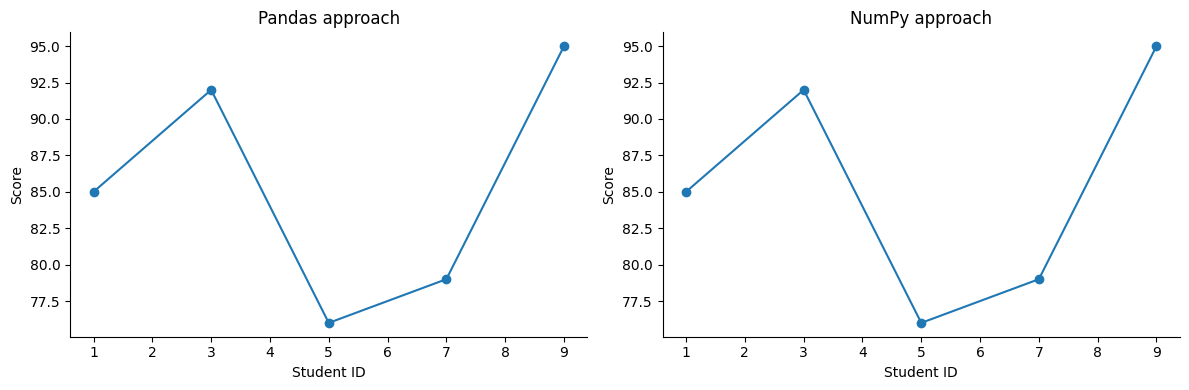

In [100]:
import matplotlib.pyplot as plt

# Approach 1: Plotting directly with pandas (column labels preserved)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(df_clean['id'], df_clean['score'], 'o-')
ax1.set_xlabel('Student ID')
ax1.set_ylabel('Score')
ax1.set_title('Pandas approach')

# Approach 2: Convert to numpy first (more explicit)
x = df_clean['id'].to_numpy()
y = df_clean['score'].to_numpy()

ax2.plot(x, y, 'o-')
ax2.set_xlabel('Student ID')
ax2.set_ylabel('Score')
ax2.set_title('NumPy approach')

plt.tight_layout()

Both approaches produce identical plots. The `pandas` approach is more concise for simple plots, while the numpy approach can be clearer when you need the data for other operations.


For example, create contour plots to represent fields over a grid can be more straightforward using numpy arrays. 

In the example below, we take tabulated data, arrange it into a grid using a pivot table, with x and y coordinates as columns and rows, get (x,y) pairs via `numpy.meshgrid()`, and then plot the contour using `matplotlib`.   

   x_position  y_position  temperature
0           0           0         20.5
1           0           1         21.2
2           0           2         22.8
3           0           3         23.1
4           0           4         22.5
5           1           0         22.1
6           1           1         23.5
7           1           2         25.2
8           1           3         24.8
9           1           4         23.9

Temperature grid:
x_position     0     1     2     3     4
y_position                              
0           20.5  22.1  24.3  25.1  23.8
1           21.2  23.5  26.8  27.3  25.2
2           22.8  25.2  28.5  28.9  26.1
3           23.1  24.8  27.2  27.8  25.5
4           22.5  23.9  25.8  26.4  24.2


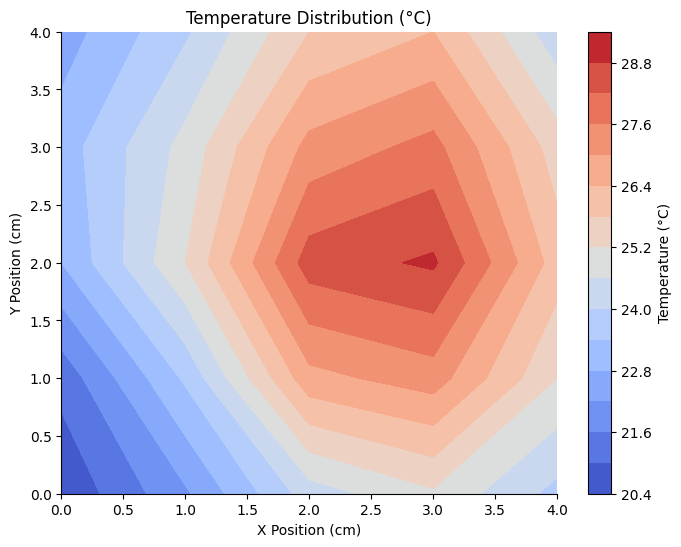

In [106]:
# Example: Creating a contour map from gridded data

# Load temperature measurements from a 5x5 grid
data = pd.read_csv('temperature_grid.csv')
print(data.head(10))

# Pivot to create a 2D grid structure
temp_grid = data.pivot(index='y_position', columns='x_position', values='temperature')
print("\nTemperature grid:")
print(temp_grid)

# Convert to numpy array for contour plotting
Z = temp_grid.to_numpy()
X, Y = np.meshgrid(temp_grid.columns, temp_grid.index)

# Create contour plot (requires numpy arrays)
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X, Y, Z, levels=15, cmap='coolwarm')
ax.set_xlabel('X Position (cm)')
ax.set_ylabel('Y Position (cm)')
ax.set_title('Temperature Distribution (°C)')
plt.colorbar(contour, label='Temperature (°C)')